# 데이터 전처리

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
all = pd.read_excel("./엑셀/Join_data.xlsx", index_col=0)

# 필요한 칼럼만 남기기
all2 = all[["DateTime", "종가_ex", "1Y_Mid_irs", "10Y_Mid_irs", "1Y_Mid_crs", "국고1년", "통안364일", "Mid_ndf", "M1_스왑포인트"]]

# 0값 삭제
index1 = all2[all2["1Y_Mid_crs"] == 0].index
all2.drop(index1, inplace=True)
index2 = all2[all2["통안364일"] == 0].index
all2.drop(index2, inplace=True)
all2.reset_index(drop=True, inplace=True)

# 전일비, 전일종가 칼럼 생성
all2["전일비_ex"] = (all2["종가_ex"] - all2["종가_ex"].shift(1)) / all2["종가_ex"].shift(1)
all2["전일비_1Y_irs"] = (all2["1Y_Mid_irs"] - all2["1Y_Mid_irs"].shift(1)) / all2["1Y_Mid_irs"].shift(1)
all2["전일비_10Y_irs"] = (all2["10Y_Mid_irs"] - all2["10Y_Mid_irs"].shift(1)) / all2["10Y_Mid_irs"].shift(1)
all2["전일비_1Y_crs"] = (all2["1Y_Mid_crs"] - all2["1Y_Mid_crs"].shift(1)) / all2["1Y_Mid_crs"].shift(1)
all2["전일비_국고"] = (all2["국고1년"] - all2["국고1년"].shift(1)) / all2["국고1년"].shift(1)
all2["전일비_통안"] = (all2["통안364일"] - all2["통안364일"].shift(1)) / all2["통안364일"].shift(1)
all2["전일비_ndf"] = (all2["Mid_ndf"] - all2["Mid_ndf"].shift(1)) / all2["Mid_ndf"].shift(1)
all2["M1_스왑포인트(원)"] = all2["M1_스왑포인트"]/100 
all2["전일종가_ex"] = all2["종가_ex"].shift(1)

# Nan 행 지우고 인덱스 초기화
all2.drop([0], axis=0, inplace=True)
all2.reset_index(drop=True, inplace=True)

# 전일비 칼럼만 남기기
all_rate = all2.copy()
all_rate = all_rate[["DateTime","종가_ex", "전일비_1Y_irs", "전일비_10Y_irs", "전일비_1Y_crs", "전일비_국고", "전일비_통안", "전일비_ndf", "M1_스왑포인트(원)", "전일종가_ex"]]

# DateTime을 인덱스로 바꿔주기
all_rate = all_rate.set_index('DateTime')
all_rate.head(2)

,종가_ex,전일비_1Y_irs,전일비_10Y_irs,전일비_1Y_crs,전일비_국고,전일비_통안,전일비_ndf,M1_스왑포인트(원),전일종가_ex
DateTime,,,,,,,,,
2012-08-02,1131.7,-0.010526,-0.017182,-0.004785,-0.010638,-0.010714,0.001546,2.5,1126.5
2012-08-03,1134.8,-0.010638,-0.006993,-0.004808,-0.007168,-0.007220,0.003527,2.4,1131.7


# MinMaxScale 후 회귀

### 이상치 찾기

<AxesSubplot:>

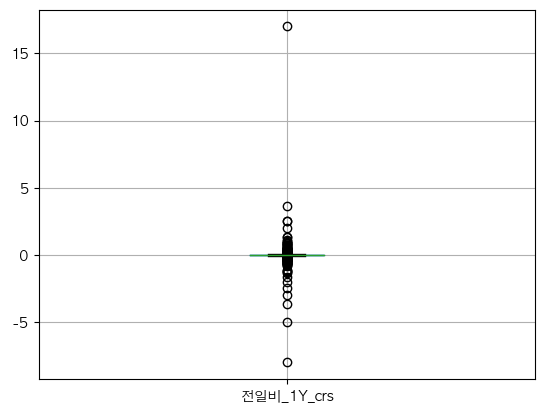

In [21]:
# 1. CRS
all_rate.boxplot(column="전일비_1Y_crs")

In [22]:
# 값이 10보다 큰 값 삭제
index3 = all_rate[all_rate["전일비_1Y_crs"] > 10].index
all_rate.drop(index3, inplace=True)
# 값이 -5보다 작은 값 삭제
index4 = all_rate[all_rate["전일비_1Y_crs"] < -5].index
all_rate.drop(index4, inplace=True)
# 인덱스 리셋
all_rate.reset_index(drop=True, inplace=True)
all_rate.describe()

,종가_ex,전일비_1Y_irs,전일비_10Y_irs,전일비_1Y_crs,전일비_국고,전일비_통안,전일비_ndf,M1_스왑포인트(원),전일종가_ex
count,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000
mean,1134.652942,0.000245,0.000236,-0.001550,0.000058,0.000173,0.000369,0.393993,1134.584736
std,55.636480,0.019114,0.025854,0.227250,0.011558,0.018234,0.027342,1.106190,55.539685
min,1008.500000,-0.362319,-0.329966,-5.000000,-0.081818,-0.246499,-0.452763,-4.500000,1008.500000
25%,1097.350000,-0.005502,-0.009800,-0.015326,-0.005319,-0.005319,-0.002950,-0.500000,1097.350000
50%,1129.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000044,0.250000,1129.000000
75%,1174.550000,0.005479,0.009112,0.016260,0.004255,0.005263,0.003090,1.350000,1174.500000
max,1326.100000,0.562500,0.492462,3.666667,0.092308,0.317343,0.830055,2.500000,1326.100000


<AxesSubplot:>

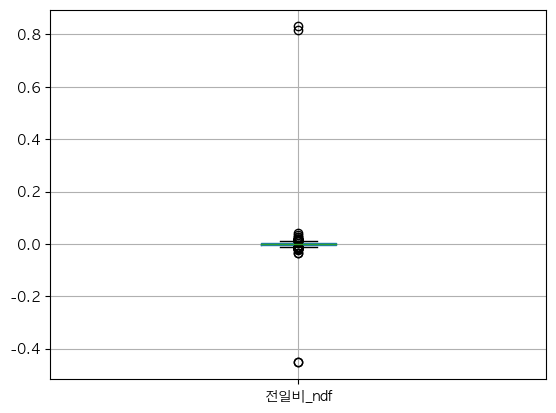

In [23]:
# 2. NDF
all_rate.boxplot(column="전일비_ndf")


In [33]:
# 값이 0.2 이상인 것 삭제
index5 = all_rate[all_rate["전일비_ndf"] > 0.2].index
all_rate.drop(index5, inplace=True)
# 값이 0.2 이하인 것 삭제
index6 = all_rate[all_rate["전일비_ndf"] < -0.2].index
all_rate.drop(index6, inplace=True)
# 인덱스 리셋
all_rate.reset_index(drop=True, inplace=True)
all_rate.describe()

,종가_ex,전일비_1Y_irs,전일비_10Y_irs,전일비_1Y_crs,전일비_국고,전일비_통안,전일비_ndf,M1_스왑포인트(원),전일종가_ex
count,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000,2443.000000
mean,1134.677507,0.000228,0.000237,-0.001563,0.000056,0.000176,0.000066,0.396541,1134.610622
std,55.678169,0.019111,0.025873,0.227435,0.011566,0.018246,0.005215,1.105288,55.581407
min,1008.500000,-0.362319,-0.329966,-5.000000,-0.081818,-0.246499,-0.034739,-4.500000,1008.500000
25%,1097.250000,-0.005510,-0.009800,-0.015326,-0.005319,-0.005305,-0.002944,-0.500000,1097.250000
50%,1129.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000044,0.250000,1129.100000
75%,1174.650000,0.005479,0.009112,0.016260,0.004237,0.005249,0.003087,1.350000,1174.550000
max,1326.100000,0.562500,0.492462,3.666667,0.092308,0.317343,0.041703,2.500000,1326.100000


<AxesSubplot:>

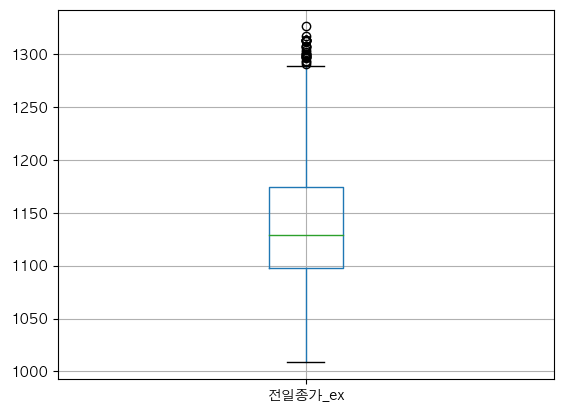

In [12]:
all_rate.boxplot(column="전일종가_ex")

In [26]:
# 그냥 해본것.. 무시무시
q1 = all_rate['전일비_1Y_crs'].quantile(0.25)
q3 = all_rate['전일비_1Y_crs'].quantile(0.75)
iqr = q3 - q1

condition1 = all_rate['전일비_1Y_crs'] > q3 + 1.5*iqr
condition2 = all_rate['전일비_1Y_crs'] < q3 + 1.5*iqr

a = all_rate[condition1].index
b = all_rate[condition2].index

print(a)
print(b)

Int64Index([ 169,  252,  677, 1127, 1145, 1163, 1346, 1384, 1385, 1436,
            ...
            2243, 2244, 2251, 2272, 2291, 2340, 2341, 2356, 2380, 2408],
           dtype='int64', length=161)
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2433, 2434, 2435, 2436, 2437, 2438, 2439, 2440, 2441, 2442],
           dtype='int64', length=2282)


### 스케일링

In [27]:
# 쓸 칼럼만 남기고 feature, target 분리해 각각 x,y 에 저장
x = all_rate[["전일비_1Y_crs", "전일비_ndf",  "전일종가_ex"]]
y = all_rate["종가_ex"]

In [28]:
# 이건 이렇게 해야 밑에 코드 8번째 줄 columns에 들어갈 수 있다고 하네요!
x.feature = x.columns 
x.feature

Index(['전일비_1Y_crs', '전일비_ndf', '전일종가_ex'], dtype='object')

In [29]:
# scaling 진행
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)

x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled

,전일비_1Y_crs,전일비_ndf,전일종가_ex
0,0.576371,0.474673,0.371537
1,0.576368,0.500597,0.387909
2,0.576923,0.345247,0.397670
3,0.578038,0.460250,0.379408
4,0.577475,0.468937,0.378778
...,...,...,...
2438,0.573413,0.487997,0.958753
2439,0.577376,0.465939,0.960957
2440,0.577374,0.449464,0.941751
2441,0.578719,0.409533,0.959698


In [30]:
# scaling 후 OLS 확인 
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 9.441e+04
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:23:29   Log-Likelihood:                -7467.5
No. Observations:                2443   AIC:                         1.494e+04
Df Residuals:                    2439   BIC:                         1.497e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        987.5225      2.393    412.751      0.000     982.831     992.214
전일비_1Y_crs     8.7015      3.972      2.191      0.029       0.913      16.490
전일비_ndf       36.3609      1.528     23.799      0.000      33.365      39.357
전일종가_ex      316.2658      0.595    531.144      0.000     315.098     317.433
==============================================================================
Omnibus:                      184.348   Durbin-Watson:                   2.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              984.701
Skew:                           0.052   Prob(JB):                    1.50e-214
Kurtosis:                       6.109   Cond. No.                         57.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 회귀

In [32]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=10)
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_pred = mlr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:}, RMSE : {1: .3f}'.format(mse, rmse))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))

MSE : 20.54476554077037, RMSE :  4.533
Variance score :  0.993
